In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.autograd


In [2]:
gen_cpu = torch.Generator()
gen_cpu.manual_seed(215)      # for repeatability

# generate  data
N, D = 200, 2
X = -5.0 + 10.0*torch.rand((N, D), generator=gen_cpu)
y = torch.matmul(X, torch.tensor([5.0, -3.0])) + 0.3 * torch.randn((N,), generator=gen_cpu)
y = y.unsqueeze(1)

In [3]:
# 3.3
# modify the training loop above to update the learning rate of SGD by moving it along the negative
# hypergradient direction using a small metalearning rate.

max_iter = 20               # number of iterations
init_lr = 1e-2              # learning rate of SGD, starting value 
meta_lr = 1e-4              # learning rate of the learning rate
batch_size = 20
loss_vals= []               # record the loss values, for plotting at the end
lr_vals = []                # record the learning rate, for plotting

W2 = torch.zeros((1,D), requires_grad=True)
B = batch_size #batch size
g_prev = torch.ones_like(W2)

for iter in range(max_iter):
    perm = torch.randperm(X.shape[0])
    X = X[perm]
    y = y[perm]
    for i in range(0, X.shape[0], B):
        X_batch = X[i:i+B, :]
        y_batch = y[i:i+B]

        y_pred = X_batch @ W2.T
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        loss.backward()
        with torch.no_grad():
            W2 -= init_lr * W2.grad
        if iter>1:
            gg = (g_prev @ W2.grad.T).item()

            if meta_lr*gg > init_lr/2:
                init_lr -= init_lr/2
            elif meta_lr*gg < -init_lr:
                init_lr -= init_lr*2
            else:
                init_lr -= meta_lr * gg
            #print(init_lr)
        
            # print(g_prev @ W2.grad.T)
            # print(init_lr)
        # zero the gradients after updating
        g_prev = W2.grad.clone()
        W2.grad.zero_()

    print(f"Iter {iter:03d}: Loss={loss.item():.6f}, LR={init_lr:.6f}")
print(W2)

Iter 000: Loss=22.808851, LR=0.010000
Iter 001: Loss=0.807561, LR=0.010000
Iter 002: Loss=0.216102, LR=0.002289
Iter 003: Loss=0.285808, LR=0.000033
Iter 004: Loss=0.145017, LR=0.000000
Iter 005: Loss=0.119638, LR=0.000000
Iter 006: Loss=0.212051, LR=0.000000
Iter 007: Loss=0.261874, LR=0.000000
Iter 008: Loss=0.188572, LR=0.000000
Iter 009: Loss=0.204180, LR=0.000000
Iter 010: Loss=0.169810, LR=0.000000
Iter 011: Loss=0.139464, LR=0.000000
Iter 012: Loss=0.146263, LR=0.000000
Iter 013: Loss=0.283443, LR=0.000000
Iter 014: Loss=0.197754, LR=0.000000
Iter 015: Loss=0.184007, LR=0.000000
Iter 016: Loss=0.321076, LR=0.000000
Iter 017: Loss=0.212718, LR=0.000000
Iter 018: Loss=0.232972, LR=0.000000
Iter 019: Loss=0.240713, LR=0.000000
tensor([[ 4.9122, -2.9340]], requires_grad=True)


In [4]:
max_iter = 20               # number of iterations
init_lr = 1e-2              # learning rate of SGD, starting value 
meta_lr = 1e-4              # learning rate of the learning rate
batch_size = 20
loss_vals= []               # record the loss values, for plotting at the end
lr_vals = []                # record the learning rate, for plotting

# model parameters
W3 = torch.zeros((1,D), requires_grad=True)
B = batch_size #batch size

optimizer = optim.SGD([W3], lr=init_lr)


for iter in range(max_iter):
    optimizer.zero_grad()
    y_pred = X @ W3.T
    loss = torch.nn.functional.mse_loss(y_pred, y)
    loss.backward()
    optimizer.step()
    print(f"Iter {iter:03d}: Loss={loss.item():.6f}, LR={init_lr:.6f}")

print(W3)

Iter 000: Loss=236.452332, LR=0.010000
Iter 001: Loss=175.313080, LR=0.010000
Iter 002: Loss=130.016068, LR=0.010000
Iter 003: Loss=96.448265, LR=0.010000
Iter 004: Loss=71.566872, LR=0.010000
Iter 005: Loss=53.120152, LR=0.010000
Iter 006: Loss=39.441273, LR=0.010000
Iter 007: Loss=29.296003, LR=0.010000
Iter 008: Loss=21.770168, LR=0.010000
Iter 009: Loss=16.186522, LR=0.010000
Iter 010: Loss=12.043188, LR=0.010000
Iter 011: Loss=8.968183, LR=0.010000
Iter 012: Loss=6.685728, LR=0.010000
Iter 013: Loss=4.991330, LR=0.010000
Iter 014: Loss=3.733329, LR=0.010000
Iter 015: Loss=2.799220, LR=0.010000
Iter 016: Loss=2.105536, LR=0.010000
Iter 017: Loss=1.590343, LR=0.010000
Iter 018: Loss=1.207677, LR=0.010000
Iter 019: Loss=0.923422, LR=0.010000
tensor([[ 4.7640, -2.8278]], requires_grad=True)


In [5]:
# 3.1 
# write a training loop using the SGD algorithm to find the optimal value w∗. 
# Use a constant learning rate for all iterations
max_iter = 20               # number of iterations
init_lr = 1e-2              # learning rate of SGD, starting value 
meta_lr = 1e-4              # learning rate of the learning rate
batch_size = 20
loss_vals= []               # record the loss values, for plotting at the end
lr_vals = []                # record the learning rate, for plotting

W = torch.zeros((1,D), requires_grad=True)
B = batch_size #batch size

for iter in range(max_iter):
    perm = torch.randperm(X.shape[0])
    X = X[perm]
    y = y[perm]
    for i in range(0, X.shape[0], B):
        X_batch = X[i:i+B, :]
        y_batch = y[i:i+B]

        y_pred = X_batch @ W.T
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        loss.backward()
        with torch.no_grad():
            W -= init_lr * W.grad
            
        # zero the gradients after updating
        W.grad.zero_()

    print(f"Iter {iter:03d}: Loss={loss.item():.6f}, LR={init_lr:.6f}")
print(W)


Iter 000: Loss=15.258115, LR=0.010000
Iter 001: Loss=1.875607, LR=0.010000
Iter 002: Loss=0.162199, LR=0.010000
Iter 003: Loss=0.110387, LR=0.010000
Iter 004: Loss=0.089197, LR=0.010000
Iter 005: Loss=0.058661, LR=0.010000
Iter 006: Loss=0.095317, LR=0.010000
Iter 007: Loss=0.108307, LR=0.010000
Iter 008: Loss=0.084304, LR=0.010000
Iter 009: Loss=0.110669, LR=0.010000
Iter 010: Loss=0.191193, LR=0.010000
Iter 011: Loss=0.108636, LR=0.010000
Iter 012: Loss=0.098391, LR=0.010000
Iter 013: Loss=0.067699, LR=0.010000
Iter 014: Loss=0.173094, LR=0.010000
Iter 015: Loss=0.084845, LR=0.010000
Iter 016: Loss=0.075729, LR=0.010000
Iter 017: Loss=0.104547, LR=0.010000
Iter 018: Loss=0.078883, LR=0.010000
Iter 019: Loss=0.108704, LR=0.010000
tensor([[ 5.0013, -3.0094]], requires_grad=True)


In [6]:
max_iter = 20               # number of iterations
init_lr = 1e-2              # learning rate of SGD, starting value 
meta_lr = 1e-4              # learning rate of the learning rate
batch_size = 20
loss_vals= []               # record the loss values, for plotting at the end
lr_vals = []                # record the learning rate, for plotting

W4 = torch.zeros((1,D), requires_grad=True)
B = batch_size #batch size
lr = init_lr

for iter in range(max_iter):
    # Compute loss
    y_pred = X @ W4.T
    loss = torch.nn.functional.mse_loss(y_pred, y)
    loss.backward()
    loss_vals.append(loss.item())
    lr_vals.append(lr)

    # gradient at iteration k
    g_k = W4.grad.detach().clone() 
    with torch.no_grad():
        W4 -= lr * W4.grad
    # zero the gradients after updating
    W4.grad.zero_()

    # Compute new gradient for hypergradient
    y_pred = X @ W4.T
    loss2 = torch.nn.functional.mse_loss(y_pred, y)
    loss2.backward()

    # gradient at iteration k+1
    #g_k1 = torch.autograd.grad(loss2, W4)[0].detach()
    g_k1 = W4.grad.detach().clone() 

    # Hypergradient: dJ/dα = - g_k^T g_{k-1}
    hypergrad = -torch.dot(g_k1.flatten(), g_k.flatten())
    # Update learning rate along negative hypergradient
    new_lr = lr - meta_lr * hypergrad.item()
    
    # Limit the rate of change
    new_lr = max(lr / 2.0, min(lr * 2.0, new_lr))
    new_lr = max(1e-6, min(1.0, new_lr))  # absolute cap
    lr = new_lr  # update current LR

    # zero the gradients after updating
    W4.grad.zero_()

    print(f"Iter {iter:03d}: Loss={loss.item():.6f}, LR={lr:.6f}")
print(W4)


Iter 000: Loss=236.452301, LR=0.020000
Iter 001: Loss=175.313049, LR=0.040000
Iter 002: Loss=91.496071, LR=0.080000
Iter 003: Loss=18.251314, LR=0.074636
Iter 004: Loss=0.326423, LR=0.074586
Iter 005: Loss=0.104213, LR=0.074584
Iter 006: Loss=0.101631, LR=0.074584
Iter 007: Loss=0.101494, LR=0.074584
Iter 008: Loss=0.101487, LR=0.074584
Iter 009: Loss=0.101486, LR=0.074584
Iter 010: Loss=0.101486, LR=0.074584
Iter 011: Loss=0.101486, LR=0.074584
Iter 012: Loss=0.101486, LR=0.074584
Iter 013: Loss=0.101486, LR=0.074584
Iter 014: Loss=0.101486, LR=0.074584
Iter 015: Loss=0.101486, LR=0.074584
Iter 016: Loss=0.101486, LR=0.074584
Iter 017: Loss=0.101486, LR=0.074584
Iter 018: Loss=0.101486, LR=0.074584
Iter 019: Loss=0.101486, LR=0.074584
tensor([[ 5.0024, -3.0060]], requires_grad=True)


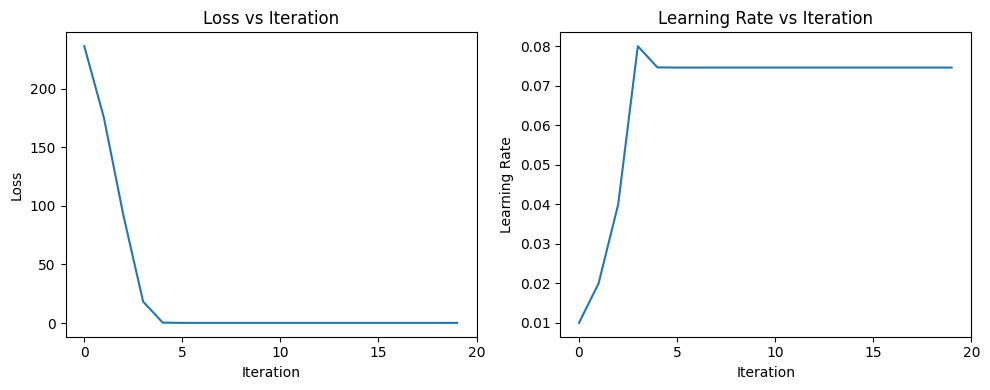

In [14]:

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_vals)
plt.title("Loss vs Iteration")
new_tick_locations = [0, 5, 10, 15, 20]
plt.xticks(new_tick_locations)
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(lr_vals)
plt.title("Learning Rate vs Iteration")
new_tick_locations = [0, 5, 10, 15, 20]
plt.xticks(new_tick_locations)
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.tight_layout()
plt.show()

Iter 000: Loss=236.452301, LR=0.020000
Iter 001: Loss=175.313049, LR=0.040000
Iter 002: Loss=91.496071, LR=0.080000
Iter 003: Loss=18.251314, LR=0.074636
Iter 004: Loss=0.326423, LR=0.074586
Iter 005: Loss=0.104213, LR=0.074584
Iter 006: Loss=0.101631, LR=0.074584
Iter 007: Loss=0.101494, LR=0.074584
Iter 008: Loss=0.101487, LR=0.074584
Iter 009: Loss=0.101486, LR=0.074584
Iter 010: Loss=0.101486, LR=0.074584
Iter 011: Loss=0.101486, LR=0.074584
Iter 012: Loss=0.101486, LR=0.074584
Iter 013: Loss=0.101486, LR=0.074584
Iter 014: Loss=0.101486, LR=0.074584
Iter 015: Loss=0.101486, LR=0.074584
Iter 016: Loss=0.101486, LR=0.074584
Iter 017: Loss=0.101486, LR=0.074584
Iter 018: Loss=0.101486, LR=0.074584
Iter 019: Loss=0.101486, LR=0.074584
tensor([[ 5.0024, -3.0060]], requires_grad=True)


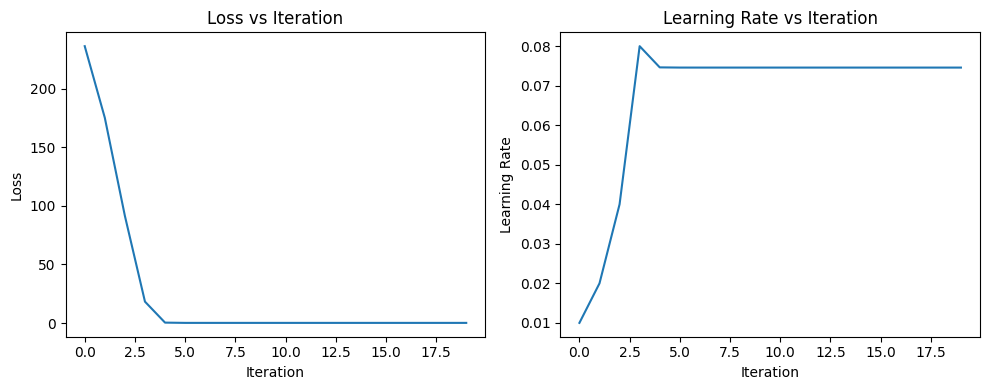

In [8]:
# Initialize weights
w4 = torch.zeros((1,D), requires_grad=True)

# Learning rate and meta-learning rate
lr = 1e-2
meta_lr = 1e-4  # meta-learning rate for updating LR
max_factor = 2.0

losses = []
lrs = []

# Training loop
for iter in range(max_iter):
    # Compute loss
    
    y_pred = X @ w4.T
    loss = torch.nn.functional.mse_loss(y_pred, y)
    losses.append(loss.item())
    lrs.append(lr)

    # Compute gradient wrt w4
    loss.backward()
    g_k = w4.grad.detach().clone()  # gradient at iteration k

    # SGD step
    with torch.no_grad():
        w4 -= lr * w4.grad

    # Compute new gradient for hypergradient
    y_new = X @ w4.T
    new_loss = torch.mean((y_new - y) ** 2)
    g_k1 = torch.autograd.grad(new_loss, w4, retain_graph=False)[0].detach()

    # Hypergradient: dJ/dα = - g_k^T g_{k-1}
    hypergrad = -torch.dot(g_k1.flatten(), g_k.flatten())

    # Update learning rate along negative hypergradient
    new_lr = lr - meta_lr * hypergrad.item()

    # Limit the rate of change
    new_lr = max(lr / max_factor, min(lr * max_factor, new_lr))
    new_lr = max(1e-6, min(1.0, new_lr))  # absolute cap

    lr = new_lr  # update current LR
    w4.grad.zero_()

    print(f"Iter {iter:03d}: Loss={loss.item():.6f}, LR={lr:.6f}")
print(w4)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(lrs)
plt.title("Learning Rate vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.tight_layout()
plt.show()